Импортируем все необходимые модули, в том числе mirror

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import mirror

## dense deterministic fixed_iter

In [10]:
n = 100
m = 10000

In [11]:
g = mirror.DataGenerator(n, m, sparse=False)
A = g.generate_A()
c = g.generate_c()
b = g.generate_b()
mr = mirror.Mirror(c=c, A=A, b=b)

In [15]:
xN, lam, tr = mr.solve(eps=0.1, N_iter=5000, trace=True)

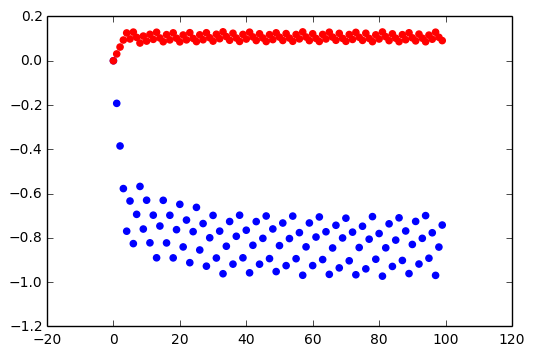

In [16]:
plt.scatter(range(100), tr['objective'][:100], color='blue')
plt.scatter(range(100), tr['constraints'][:100], color='red')
plt.show()

In [17]:
mr.objective(xN) - mr.dual(lam)

-0.66559532154074219

## sparse deterministic fixed_iter

In [23]:
n = 100
m = 10000

In [24]:
g = mirror.DataGenerator(n, m, sparse=True, density=0.1)
A = g.generate_A()
c = g.generate_c()
b = g.generate_b()
mr = mirror.Mirror(c=c, A=A, b=b)

In [25]:
xN, lam, tr = mr.solve(eps=0.1, N_iter=1000, stochastic=False, trace=True)

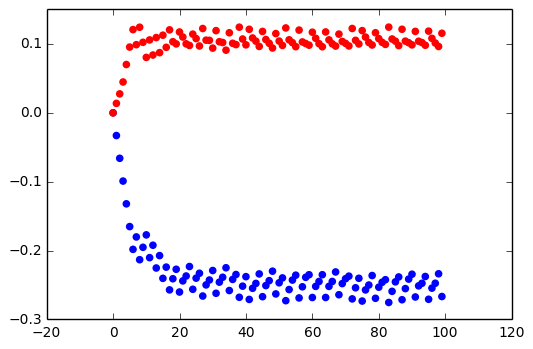

In [26]:
plt.scatter(range(100), tr['objective'][:100], color='blue')
plt.scatter(range(100), tr['constraints'][:100], color='red')
plt.show()

## dense stochastic fixed_iter

In [27]:
n = 100
m = 10000

In [28]:
g = mirror.DataGenerator(n, m, sparse=False)
A = g.generate_A()
c = g.generate_c()
b = g.generate_b()
mr = mirror.Mirror(c=c, A=A, b=b)

In [29]:
xN, lam, tr = mr.solve(eps=0.1, N_iter=1000, stochastic=True, trace=True)

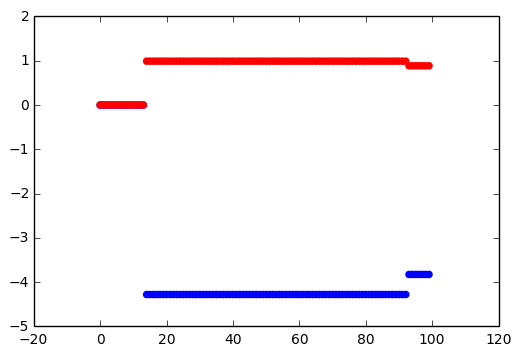

In [30]:
plt.scatter(range(100), tr['objective'][:100], color='blue')
plt.scatter(range(100), tr['constraints'][:100], color='red')
plt.show()

## sparse stochastic fixed_iter

In [31]:
n = 100
m = 10000

In [32]:
g = mirror.DataGenerator(n, m, sparse=True, density=0.1)
A = g.generate_A()
c = g.generate_c()
b = g.generate_b()
mr = mirror.Mirror(c=c, A=A, b=b)

In [33]:
xN, lam, tr = mr.solve(eps=0.1, N_iter=1000, stochastic=True, trace=True)

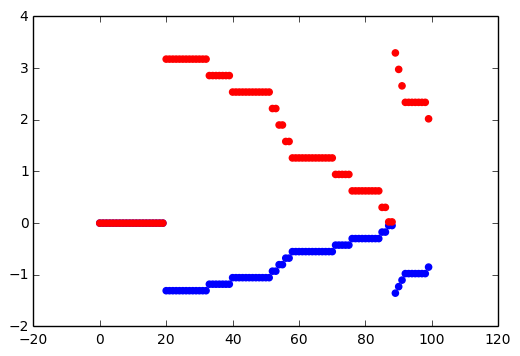

In [34]:
plt.scatter(range(100), tr['objective'][:100], color='blue')
plt.scatter(range(100), tr['constraints'][:100], color='red')
plt.show()

## dense deterministic accuracy

In [2]:
n = 100
m = 10000

In [3]:
g = mirror.DataGenerator(n, m, sparse=False)
A = g.generate_A()
c = g.generate_c()
b = g.generate_b()
mr = mirror.Mirror(c=c, A=A, b=b)

In [4]:
print 'Mg = ' + str(mr.Mg)
print 'Mf = ' + str(mr.Mf)

Mg = 6.64727192033
Mf = 30.6554190907


In [5]:
xN, lam, tr = mr.solve(eps=0.1, stochastic=False, max_iter=1000, check_every=100, trace=True)

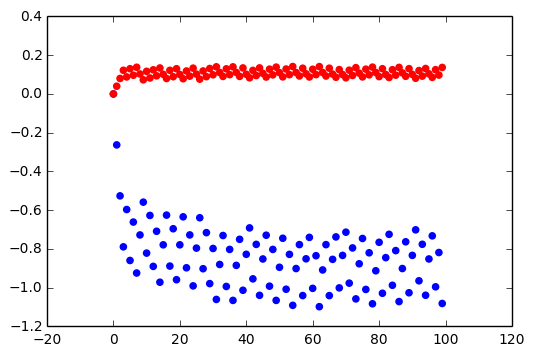

In [6]:
plt.scatter(range(100), tr['objective'][:100], color='blue')
plt.scatter(range(100), tr['constraints'][:100], color='red')
plt.show()

In [7]:
mr.objective(xN)

-0.69915090364686183

In [8]:
mr.dual(lam)

-0.60013502293451926

In [9]:
tr['gap']

[-0.63164699373708344]

## sparse deterministic accuracy

In [42]:
n = 100
m = 10000

In [43]:
g = mirror.DataGenerator(n, m, sparse=True, density=0.1)
A = g.generate_A()
c = g.generate_c()
b = g.generate_b()
mr = mirror.Mirror(c=c, A=A, b=b)

In [44]:
xN, lam, tr = mr.solve(eps=0.1, stochastic=False, max_iter=1000, check_every=100, trace=True)

Maximum number of iterations reached


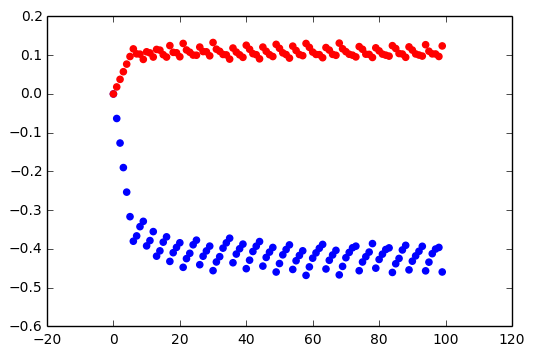

In [45]:
plt.scatter(range(100), tr['objective'][:100], color='blue')
plt.scatter(range(100), tr['constraints'][:100], color='red')
plt.show()

In [46]:
tr['gap']

[0.23623071521123673,
 0.25000810764927528,
 0.25680712565624897,
 0.25865116220067097,
 0.25948948858862325,
 0.2621535577484555,
 0.26175363217532749,
 0.26249102897570936,
 0.26305449993461938]

## dense stochastic accuracy

In [1]:
n = 10
m = 1000

In [3]:
g = mirror.DataGenerator(n, m, sparse=False)
A = g.generate_A()
c = g.generate_c()
b = g.generate_b()
mr = mirror.Mirror(c=c, A=A, b=b)

In [4]:
xN, lam, tr = mr.solve(eps=0.1, stochastic=False, max_iter=1000, check_every=100, trace=True)

Maximum number of iterations reached


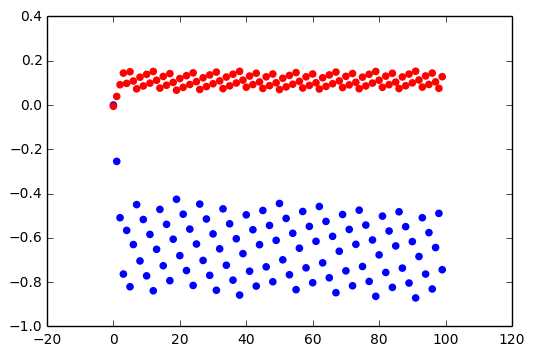

In [5]:
plt.scatter(range(100), tr['objective'][:100], color='blue')
plt.scatter(range(100), tr['constraints'][:100], color='red')
plt.show()

## sparse stochastic accuracy

In [6]:
n = 10
m = 1000

In [7]:
g = mirror.DataGenerator(n, m, sparse=True, density=0.3)
A = g.generate_A()
c = g.generate_c()
b = g.generate_b()
mr = mirror.Mirror(c=c, A=A, b=b)

In [8]:
xN, lam, tr = mr.solve(eps=0.1, stochastic=False, max_iter=1000, check_every=100, trace=True)

Maximum number of iterations reached


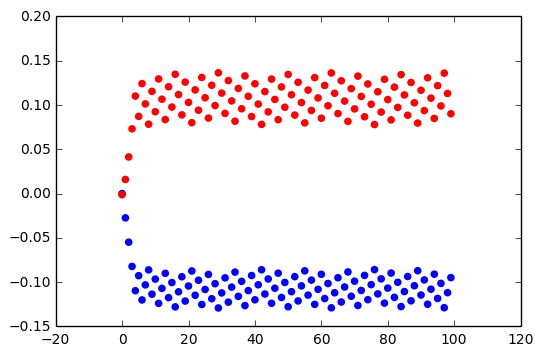

In [9]:
plt.scatter(range(100), tr['objective'][:100], color='blue')
plt.scatter(range(100), tr['constraints'][:100], color='red')
plt.show()